### This assignment may be worked individually or in pairs. 
### Enter your name/names here:

In [172]:
# Danica Padlan(dmp3357) and Ashley Yude(acy366)

In [1]:
# headers
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# function to calculate adjusted r2
def get_adj_r2(r2, n, p):
    return (1-(1-r2)*((n-1)/(n-p-1)))

# Assignment 2: Regression and KNN classifier

## Part 1: Regression with scikit-learn

In this part of the assignment, you will fit a regression model to an insurance dataset using the scikit-learn package. 

The insurance company would like to be able to estimate the annual medical expenditures they will need to pay for any customer, based on the customer's age, sex, BMI, # of children, whether they are a smoker, and their region of residence. 

Estimates from this model can be used to then determine how much to charge each customer for insurance (the more we think you'll cost us, the more we will charge you).

**Data Prep**

Q1. Read the dataset from 'medical-charges.txt' into a Pandas Dataframe. Display the head of the dataset. There should be 1138 rows and 7 columns. The target column (y) is the `charges` column.

In [3]:
data = pd.read_csv('medical-charges.txt')
print(data.head)

<bound method NDFrame.head of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>


Q2. Notice that there are several categorical columns. You'll need to transform these to be able to do regression. Since `sex` and `smoker` are binary in this dataset, let's do them differently than `region` which has 4 options.

* Use the Pandas [get_dummies()](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) function to one-hot-encode `sex` and `smoker`. 
* Since these features are binary, we do not need to create two columns for each of them (i.e. we do not need both smoker_yes and smoker_no - just having a smoker_yes column will be sufficient), so use the `drop_first` parameter of get_dummies to create only a `smoker_yes` and a `sex_male` column. 
* Display the head of the dataframe.

In [4]:
data['sex'] = pd.get_dummies(data.sex, drop_first=True)
data['smoker'] = pd.get_dummies(data.smoker, drop_first=True)
data.rename(columns = {'sex':'sex_male', 'smoker':'smoker_yes'}, inplace = True)

print(data.head)

<bound method NDFrame.head of       age  sex_male     bmi  children  smoker_yes     region      charges
0      19         0  27.900         0           1  southwest  16884.92400
1      18         1  33.770         1           0  southeast   1725.55230
2      28         1  33.000         3           0  southeast   4449.46200
3      33         1  22.705         0           0  northwest  21984.47061
4      32         1  28.880         0           0  northwest   3866.85520
...   ...       ...     ...       ...         ...        ...          ...
1333   50         1  30.970         3           0  northwest  10600.54830
1334   18         0  31.920         0           0  northeast   2205.98080
1335   18         0  36.850         0           0  southeast   1629.83350
1336   21         0  25.800         0           0  southwest   2007.94500
1337   61         0  29.070         0           1  northwest  29141.36030

[1338 rows x 7 columns]>


Q3. Now one-hot encode the `region` feature by again using `get_dummies()`, but this time, even though we could drop one column, let's go ahead and explicitly keep all 4 values as columns (i.e. drop_first should be set to False). Display the head of the resulting dataframe.

In [5]:
regions = pd.get_dummies(data.region, drop_first=False)
data = pd.concat([data, regions], axis=1)

#get rid of og regions column
data.drop(columns='region', inplace=True)

print(data.head)

<bound method NDFrame.head of       age  sex_male     bmi  children  smoker_yes      charges  northeast  \
0      19         0  27.900         0           1  16884.92400          0   
1      18         1  33.770         1           0   1725.55230          0   
2      28         1  33.000         3           0   4449.46200          0   
3      33         1  22.705         0           0  21984.47061          0   
4      32         1  28.880         0           0   3866.85520          0   
...   ...       ...     ...       ...         ...          ...        ...   
1333   50         1  30.970         3           0  10600.54830          0   
1334   18         0  31.920         0           0   2205.98080          1   
1335   18         0  36.850         0           0   1629.83350          0   
1336   21         0  25.800         0           0   2007.94500          0   
1337   61         0  29.070         0           1  29141.36030          0   

      northwest  southeast  southwest  
0    

Q4. An interesting thing to check with regression problems is whether any of the individual features correlate very strongly with the label. Use the `corr()` method on the dataframe to take a look at this.

Answer as a comment: Do you see any features with a strong correlation to the label?

In [7]:
print(data.corr())

#smoker_yes has a strong correlation with charges

                 age  sex_male       bmi  children  smoker_yes   charges  \
age         1.000000 -0.020856  0.109272  0.042469   -0.025019  0.299008   
sex_male   -0.020856  1.000000  0.046371  0.017163    0.076185  0.057292   
bmi         0.109272  0.046371  1.000000  0.012759    0.003750  0.198341   
children    0.042469  0.017163  0.012759  1.000000    0.007673  0.067998   
smoker_yes -0.025019  0.076185  0.003750  0.007673    1.000000  0.787251   
charges     0.299008  0.057292  0.198341  0.067998    0.787251  1.000000   
northeast   0.002475 -0.002425 -0.138156 -0.022808    0.002811  0.006349   
northwest  -0.000407 -0.011156 -0.135996  0.024806   -0.036945 -0.039905   
southeast  -0.011642  0.017117  0.270025 -0.023066    0.068498  0.073982   
southwest   0.010016 -0.004184 -0.006205  0.021914   -0.036945 -0.043210   

            northeast  northwest  southeast  southwest  
age          0.002475  -0.000407  -0.011642   0.010016  
sex_male    -0.002425  -0.011156   0.017117  -0.0

Q5. Create a plot to show the difference in charges between the smokers and the non-smokers. 

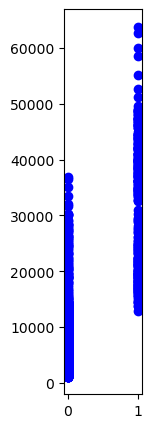

In [8]:
plt.figure(figsize=(1, 5))
plt.scatter(data['smoker_yes'], data['charges'].values, c='blue')

Q6. Let's explore the relationship between `age` and `charges`. Create a scatter plot of all data points to show age vs charges. 

Answer as a comment: What do you notice about the nature of this relationship?

<AxesSubplot: xlabel='age', ylabel='charges'>

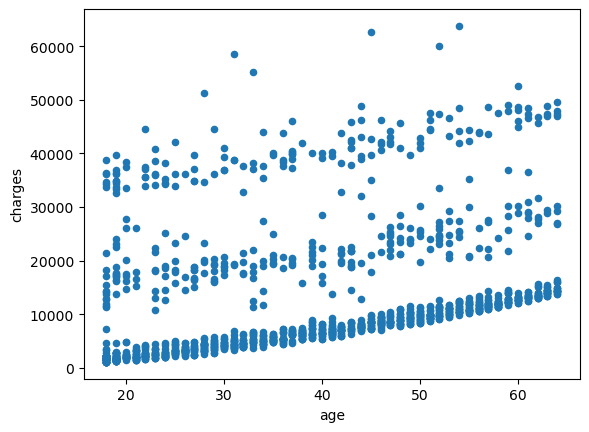

In [9]:
data.plot.scatter(x='age', y='charges')
#The older the age, the higher the charges are

#### Simple Linear Regression
**Fit a simple linear regression model to predict `charges` from `age`.**

Q7. 
* Grab the `age` column from the dataframe and call it something like `x`.
* Grab the `charges` column from the dataframe and call it something like `y`.
* When doing simple linear regression (one feature), you need to convert the features from a Series to a list of lists. You can do this by doing `x = x.values.reshape(-1,1)`, where the (-1,1) means (all rows, one column). 
* Do the same to the labels (`y = y.values.reshape(-1,1)`). 
* Verify that you have a list of lists for both x and y.

In [10]:
x = data['age']
y = data['charges']

x = x.values.reshape(-1,1)
y = y.values.reshape(-1,1)

print("X List:")
print(x)
print("Y List:")
print(y)

X List:
[[19]
 [18]
 [28]
 ...
 [18]
 [21]
 [61]]
Y List:
[[16884.924 ]
 [ 1725.5523]
 [ 4449.462 ]
 ...
 [ 1629.8335]
 [ 2007.945 ]
 [29141.3603]]


**Using the holdout method**

Q8. Use [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split your dataset into training and test sets. Do an 80%-20% split. Display how many records are in the training set and how many are in the test set. Set the random_state argument to your favorite number.

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.20, train_size=.80, random_state=13)

Q9. 
* Create a [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) object. 
* Call `fit` on it and pass in the training set.
* Print the slope and the intercept of the equation with the `.coef_` and `.intercept_` attributes. 

In [12]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression().fit(x_train, y_train)

print("Coef:")
print(linear_reg.coef_)

print("Intercept:")
print(linear_reg.intercept_)


Coef:
[[255.01540154]]
Intercept:
[3416.88205707]


Q10. Now that you've fit the model on the training set, you can evaluate it on the test set. Call `predict` on the linear regression object and pass in the test set. Save the return value - these are all of the predicted values under the model for the test set. 

Compute some metrics to see how well this model fits the test data. Use `sklearn.metrics` to print out the MAE, MSE, RMSE, and R2 for the test set under this model. Remember that you have the actual y values for your test set, up in Q8.  

In [13]:
import sklearn.metrics as metrics

y_predict = linear_reg.predict(x_test)
MAE = metrics.mean_absolute_error(y_test, y_predict)
MSE = metrics.mean_squared_error(y_test, y_predict)
RMSE = metrics.mean_squared_error(y_test, y_predict, squared=False)
R2 = metrics.r2_score(y_test, y_predict)

print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)
print("R2: ", R2)

MAE:  8972.827166443149
MSE:  129260588.57609686
RMSE:  11369.282676409135
R2:  0.09059782660871818


Q11. Let's see what the best fit line looks like with the test data. Scatter-plot the test data (x_test, y_test). Then line-plot the model predictions for the test data (x_test, y_test_preds). 

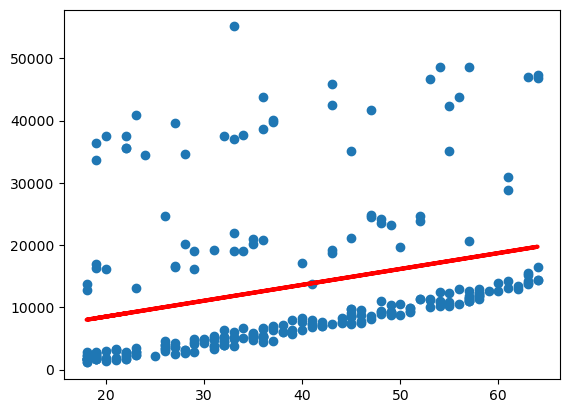

In [14]:
plt.scatter(x=x_test, y=y_test)
plt.plot(x_test, y_predict, color="red", linewidth=3)

Q12. Now, go back up to your Q8, change the random_state to a different number, and re-run Q9, Q10, Q11. 

Answer as a comment: What happened and why?

In [15]:
# answer as a comment here
# random number = 13
# Coef:
# [[255.01540154]]
# Intercept:
# [3416.88205707]
# MAE:  8972.827166443149
# MSE:  129260588.57609686
# RMSE:  11369.282676409135
# R2:  0.09059782660871818

# random number = 9
# Coef:
# [[262.91295986]]
# Intercept:
# [3050.56668952]
# MAE:  8966.449673643923
# MSE:  130404294.87051001
# RMSE:  11419.469990788102
# R2:  0.07763293267060645

# Some of the values changed between the change of random_state values. 
# In this case, Intercept, MAE , and R2 decreased while Coef, MSE, and RMSE increased.
# This is due to the random_state values changing what data split we are testing on.

**Using cross-validation**

Q13. Use `sklearn.model_selection.cross_val_score` to perform 5-fold cross validation on a simple linear regression model. 

You will pass the FULL dataset (x and y from before the train/test split in Q8) into `cross_val_score` which will automatically divide it into the number of folds you tell it to, fit a linear regression model to the training set for each fold, and test it on the test set for each fold. It will return a numpy array with the R2 on the test set for each fold. Average these R2 scores to print out the generalization estimate of the model.

On average, after 5 trials with 5 different test sets, this is how well we think a linear regression of using `age` to predict `charges` will work. 

In [16]:
from sklearn.model_selection import cross_val_score

# x = age, y = charges initialized already 

cur_r2_score = cross_val_score(linear_reg, x, y, cv=5)

#loop through to get the total and then divide by 5 
total = 0;
for i in range(len(cur_r2_score)):
    total += cur_r2_score[i]
    

print("Average R2 Scores ", (total/5))

Average R2 Scores  0.08821241573294034


#### Multiple Linear Regression
**Fit a multiple linear regression model to predict `charges` from `age` and `smoker`.**

Q14. Now let's see if we can get a better model by including another feature.
* From the one-hot-encoded dataframe (the result of Q3), grab both the `age` and `smoker_yes` columns. Call it something like x. 
* (No need to call a reshape this time, since it is multi-dimensional data now.)
* You already have the y's.
* Create a new `sklearn.linear_model.LinearRegression` object. (Or you can re-use the one you already have.)
* Pass it all into a `sklearn.model_selection.cross_val_score` with a 5-fold CV.
* Print out the average R2.
* Once we get into **multiple** linear regression, we should not use R2, we should instead use adjusted-R2. Use the provided (at the top of the file) `get_adj_R2()` function to print out the adjusted R2. (Note, this value will be very close to the R2 because our `n` is large and our `p` is small.)

Answer as a comment: What happens when you include `smoker_yes`?

In [17]:
x = data[['age', 'smoker_yes']]

#using same y

cur_r2_scores = cross_val_score(linear_reg, x, y, cv=5)

for i in range(len(cur_r2_score)):
    total += cur_r2_score[i]
    
avg_r2 = (total/5)

print("Average R2 Scores ", avg_r2)

#use adjusted R2
adj_r2 = get_adj_r2(avg_r2, len(x), 2)

print("Adjusted R2 Scores ", adj_r2)

#Answer:
#Adding 'smoker_yes' makes the R2 score higher than just using 'age' as an indicator for the class label

Average R2 Scores  0.17642483146588067
Adjusted R2 Scores  0.17519101098867618


Q15. Let's go one more step and see if including ALL of our features is even better at predicting the `charges` than using just `age` and `smoker`.

* From the one-hot-encoded dataframe (the result of Q3), grab all the features, but NOT the target. Call it something like x.
* (No need to call a reshape this time, since it is multi-dimensional data now.)
* You already have the y's.
* Create a new sklearn.linear_model.LinearRegression object. (Or you can re-use the one you already have.)
* Pass it all into a sklearn.model_selection.cross_val_score with a 5-fold CV.
* Print out the average R2 and the adjusted R2.

In [18]:
x = data.drop(['charges'], axis=1)

#using same y

cur_r2_scores = cross_val_score(linear_reg, x, y, cv=5)

for i in range(len(cur_r2_score)):
    total += cur_r2_score[i]
    
avg_r2 = (total/5)

print("Average R2 Scores ", avg_r2)

#use adjusted R2
adj_r2 = get_adj_r2(avg_r2, len(x), 2)

print("Adjusted R2 Scores ", adj_r2)

Average R2 Scores  0.2646372471988211
Adjusted R2 Scores  0.26353558015342615


Q16. Build the final model on the entire dataset. 
* You should already have your x from the previous question (Q15).
* You already have the y's.
* Create a new `sklearn.linear_model.LinearRegression` object, or you can re-use the one you already have.
* Call `fit` and pass in all the data (x, y).
* Print out the coefficients and the intercept of the fitted model. The coefficients correspond to the the order in which the features are in the dataframe (x).

This defines your multiple linear regression equation! 

In [28]:
linear_reg = LinearRegression().fit(x, y)

print("Coefs:")
print(linear_reg.coef_)

print("Intercept:")
print(linear_reg.intercept_)

Coefs:
[[  256.85635254  -131.3143594    339.19345361   475.50054515
  23848.53454191   587.00923503   234.0453356   -448.01281436
   -373.04175627]]
Intercept:
[-12525.5478112]


## Part 2: K-Nearest Neighbors from scratch

In this part of the assignment you'll implement the K-Nearest Neighbors (KNN) classification algorithm to classify patients as either having or not having diabetic retinopathy. For this task we'll be using the same Diabetic Retinopathy data set which was used in the previous assignment on decision trees. 

You may use the following function to print a confusion matrix:

In [29]:
def print_confusion_matrix(TP, FN, FP, TN):
    
    table_data = [[TP,FN],[FP,TN]]
    df = pd.DataFrame(table_data, columns =['Predicted 1','Predicted 0'])
    df = df.rename(index={0: 'Actual 1', 1: 'Actual 0'})
    display(df)

In [30]:
# you may use these constants if you want
LABEL_COLUMN = 19
BINARY_COLUMNS = {0,1,18}

Q1. Normalize the data so that each feature value lies between `[0-1]`.

In class, we talked about why scaling the data is critical to KNN. We also talked about how data scaling should be done *inside the cross validataion loop*. This means that the scaling parameters should be based on the **training set only**, in order to prevent data leakage. Then the test data will need to be scaled, using the parameters found on the **training** data.

Fill in the function to take in a training dataset and a test dataset and normalize them correctly. Return the normalized datasets.

Caution: Return NEW datasets that have been normalized - do not normalize the datasets in-place, so that this can be run numerous times without altering the original data or normalizing already normalized data.

Hint: When using dataframes, you can do this without a loop!

In [31]:
from sklearn import preprocessing

def normalize_data(train, test):
    train_norm=(train-train.min())/(train.max()-train.min())
    test_norm=(test-train.min())/(train.max()-train.min())
    return train_norm, test_norm

In [32]:
#works!!!
#testing normalize_data
# Re-read data (to un-do normalization)
# train_set = pd.read_csv("sample_train.txt", header=None)
# test_set = pd.read_csv("sample_test.txt", header=None)

# train_norm, test_norm = normalize_data(train_set, test_set)
# print("Before: ")
# print(train_set)
# print(test_set)
# print("After: ")
# print(train_norm)
# print(test_norm)

Q2. The distance calculation method is central to the KNN algorithm. In this assignment you'll be using the Euclidean distance. 

Implement a function that takes in one data point (as a list), and the training data (as a dataframe), and calculates the Euclidian distance from the single data point to each of the data points in the training data.

You may return these however you want (or may add them to the dataframe?).

Hint: 
For KNN, the distance calculations are the most time-consuming part of the algorithm. Even though computing Euclidian distance seems like a simple, and therefore quick, calculation, running it thousands of times, inside of a nested 5-fold cross-validation for example, can cause this algorithm to take a very long time to run, depending on your implementation. 

Remember, you almost never need to loop a Dataframe! Pandas DataFrames have been specifically optimized for fast operations on large datasets, by [vectorizing](https://www.quantifisolutions.com/vectorization-part-2-why-and-what) calculations across all rows at once.

If you use a DataFrame, you should not write a loop to calculate each of the Euclidian distances one at a time. Look at [this post](https://stackoverflow.com/questions/46908388/find-euclidean-distance-from-a-point-to-rows-in-pandas-dataframe?rq=1) for more info.

Caution: Be careful not to use the label in your distance calculation.

In [33]:
def get_distances(point, df):
    df['distance'] = (df.iloc[:, df.columns != LABEL_COLUMN]).sub(point, axis=1).pow(2).sum(axis=1).pow(0.5)
    return None

In [34]:
# # # # #TESTED
# # # #testing get_distances!
# train_point = [ [7,7, 0], [7,4, 0] , [3,4, 1] , [1,4, 0]]
# train = pd.DataFrame(train_point, columns=['Acid Durability', 'Strength', 'Label'])

# test_point = [[4, 6, 0]]
# test = pd.DataFrame(test_point, columns=['Acid Durability', 'Strength', 'Label'])

# print("Test")
# print(test)

# get_distances(test, train)

# print("After")
# print(train)

Q3. Build your KNN classifier.

This function takes in a training set (as a dataframe), a test set (as a dataframe), and a k to use, and classifies all data points in the test set, using the data in the training set and the given k.

It should return the predicted labels for the test set as a list.

Caution: Remember to normalize your data before doing distance calculations.

In [35]:
def run_knn(train_set, test_set, k):
    
    predicted_labels = []
    # Normalize data
    train, test = normalize_data(train_set, test_set)

    # classify data in test set
    for i, row in test.iterrows():
        
        # get distances all neighbors for each point in test set 
        get_distances(row, train)
        train.sort_values(by=['distance'], ascending=True,inplace=True)

        # get the top k values
        top_k = train.iloc[0:k, train.columns==LABEL_COLUMN]

        # find majority of predicted label
        one_count = 0;
        zero_count = 0;
        for votes in range(len(top_k)):
            if (top_k.iloc[votes,0] == 1):
                one_count += 1  
            else:
                zero_count += 1
                
        # append predicions to list
        predicted_labels.append(1) if (one_count > zero_count) else predicted_labels.append(0)
        train.drop("distance", axis=1,inplace=True)
        
    return predicted_labels

In [37]:
# Tested run_knn
# print("\nQ3. run_knn():")
# # Re-read data (to un-do normalization)
# train_set = pd.read_csv("sample_train.txt", header=None)
# test_set = pd.read_csv("sample_test.txt", header=None)

# # need to add printouts to run_knn() to see results
# preds = run_knn(train_set, test_set, k=3)
# print(preds)

Q4. Find the best value of k for this data. 

Try k ranging from 1 to 10 (odds only). For each k value, use a 5-fold cross validation to evaluate the accuracy with that k. In each fold of CV, divide your data into a training set and a validation set. Print out the best value of k and the accuracy achieved with that value. Return the best value of k. If there is a tie for best k, use the lowest of the k values.

Hint: This is the *inner* loop of a nested cross validation.

In [38]:
def find_best_k(data):
    best_k = 0;
    best_accuracy = 0
    for k in range (10):
        # only odd numbers
        if (k%2 != 0):
            print("current k: ", k)
            acc_avg_total = 0
            start_test = 0
            increment = int(len(data)/5) # equals to 3 on train_set given
            end_test = increment
            
            #cross validation loop for 5-fold
            for x in range (5):

                # partition data into train_set and test_set
                first_train_set = data[0:start_test]
                last_train_set = data[end_test:len(data)]
                train_set = [first_train_set, last_train_set]
                train_set = pd.concat(train_set)
                
                test_set = data[start_test:end_test]

                # run knn
                prediction = run_knn(train_set, test_set, k)
                
                # compare prediction to actual
                correct = 0
                for i in range (len(prediction)):
                    temp = test_set.iloc[i]
                    
                    if (prediction[i] == temp[LABEL_COLUMN]):
                        correct += 1
                
                accuracy = correct/len(prediction)
                
                # update start and end values
                start_test += increment
                end_test += increment

                acc_avg_total += accuracy

            #print acc_avg_total / 5 overall accuracy   
            print('Avg error over 5-fold:', (acc_avg_total / 5) )
    
            #update best_k and best_accuracy
            if (acc_avg_total > best_accuracy):
                best_k = k
                best_accuracy = acc_avg_total
        
    return best_k

In [39]:
print("\nQ4. find_best_k():")
# Re-read data (to un-do normalization)
train_set = pd.read_csv("sample_train.txt", header=None)
test_set = pd.read_csv("sample_test.txt", header=None)

# find the best k on the training set
# need to add printouts in find_best_k() to see results
k = find_best_k(train_set) 
print("best_k: ", k)


Q4. find_best_k():
current k:  1
Avg error over 5-fold: 0.5333333333333334
current k:  3
Avg error over 5-fold: 0.4666666666666666
current k:  5
Avg error over 5-fold: 0.4666666666666667
current k:  7
Avg error over 5-fold: 0.5333333333333334
current k:  9
Avg error over 5-fold: 0.5999999999999999
best_k:  9


Q5. Now measure the accuracy of your classifier using 5-fold cross validation. 

In each fold of this CV, divide your data into a training set and a test set. The training set should get sent through your code for Q4, resulting in a value of k to use. Using that k, calculate an accuracy on the test set. You will average the accuracy over all 5 folds to obtain the final accuracy measurement. 

Print the accuracy, the confusion matrix, and the precision and recall for class label 1 (patients that have been diagnosed with the disease).

In [41]:
import time

def run_CV():
    # read in data
    data = pd.read_csv('messidor_features.txt', header = None)

    #start_time = time.time()
    acc_avg_total = 0
    start_test = 0
    increment = int(len(data)/k) # equals to 3 on train_set given
    end_test = increment
    
    for x in range(5):
         # partition data into train_set and test_set
        first_train_set = data[0:start_test]
        last_train_set = data[end_test:len(data)]
        train_set = [first_train_set, last_train_set]
        train_set = pd.concat(train_set)

        test_set = data[start_test:end_test]

        # run knn
        prediction = run_knn(train_set, test_set, k)

        # compare prediction to actual
        correct = 0
        for i in range (len(prediction)):
            temp = test_set.iloc[i]
            if (prediction[i] == temp[LABEL_COLUMN]):
                correct += 1

        accuracy = correct/len(prediction)

        #update start and end values
        start_test += increment
        end_test += increment

        acc_avg_total += accuracy

#   print acc_avg_total / 5 overall accuracy   
    print('Avg error over 5-fold:', (acc_avg_total / 5) )
        
    true_pos = 0
    true_neg = 0
    false_pos = 0
    false_neg = 0
    
    for x in range(len(prediction)):
        pred_val = prediction[x]
        label = test_set.iloc[x, LABEL_COLUMN]
        
        if (pred_val == label & pred_val == 1): true_pos+=1
        elif (pred_val == label & pred_val == 0): true_neg+=1
        elif (pred_val != label & pred_val == 1): false_pos+=1
        else: false_neg+=1
    
    print_confusion_matrix(true_pos, false_neg, false_pos, true_neg)
    
    #calc precision and recall
    print("Precision: ", true_pos/(true_pos + false_pos))
    print("Recall: ", true_pos/(true_pos + false_neg))
    
run_CV()

Avg error over 5-fold: 0.6456692913385826


,Predicted 1,Predicted 0
Actual 1,41,21
Actual 0,0,65


Precision:  1.0
Recall:  0.6612903225806451
